# WeRateDogs - Data wrangling project

By Akshai Ramesh

In [1]:
#import packages
import requests
import numpy as np
import pandas as pd
import tweepy
import os
import json
from timeit import default_timer as timer
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Gather data

### a. Retrieve image file

In [2]:
#Use requests library to download tsv file from the url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
response

<Response [200]>

In [3]:
#image file should be stored in a separate folder
folder_name='image predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#create a path for the folder and save it
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [5]:
#read in csv file as a pandas dataframe
images = pd.read_csv('image-predictions.tsv', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#twitter developer account's consumer key and secret key
consumer_key = "*******"
consumer_secret = "***********"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth

In [7]:
#set access token and secret token
access_token = "********"
access_token_secret = "**********"
auth.set_access_token(access_token, access_token_secret)

In [8]:
#set the auth object to api
api = tweepy.API(auth)

## 2.Retrieving twitter file content 

In [9]:
#read in twitter content as pandas dataframe
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [10]:
#display top 5 records in the dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 3. Retrieving twitter json content

In [11]:
tweet_ids = list(twitter_archive.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        #print(tweet_ids.index(tweet) + 1, "/", "2354")
    except:
        print("Error for: " + str(tweet))
        #print(tweet_ids.index(tweet) + 1, "/", "2354")

In [12]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [13]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
twitter_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])


In [15]:
#display top 5 records in twitter_json dataframe
twitter_json.head()

,tweet_id,retweets,favorites
0,892420643555336193,7962,37195
1,892177421306343426,5910,31987
2,891815181378084864,3908,24089
3,891689557279858688,8114,40506
4,891327558926688256,8798,38736


# Data assessment

## Assessment of twitter archive dataframe

In [16]:
#display top 5 records in twitter_archive dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
#display the info of columns in twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
#describe the dataframe's numerical summary
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#display datatypes of twitter_archive dataframe
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

## b. Assessment of images dataframe

In [20]:
#display top 5 records in images dataframe
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
#display datatypes of images dataframe
images.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [22]:
#display the info of columns in images dataframe
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#describe the dataframe's numerical summary
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#display the number of missing url
images.jpg_url.isna().sum()

0

In [25]:
#count of each dog in p1 algorithm
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [26]:
#count of each dog in p2 algorithm
images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
malinois                           20
chow                               20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [27]:
#count of each dog in p3 algorithm
images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

## Assessment of json content dataframe

In [28]:
#display top 5 records in twitter_json dataframe
twitter_json.head()

,tweet_id,retweets,favorites
0,892420643555336193,7962,37195
1,892177421306343426,5910,31987
2,891815181378084864,3908,24089
3,891689557279858688,8114,40506
4,891327558926688256,8798,38736


In [29]:
#display datatypes of twitter_archive dataframe
twitter_json.dtypes

tweet_id     int64
retweets     int64
favorites    int64
dtype: object

In [30]:
#display the info of columns in twitter_archive dataframe
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id     2332 non-null int64
retweets     2332 non-null int64
favorites    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [31]:
#describe the dataframe's numerical summary
twitter_json.describe()

,tweet_id,retweets,favorites
count,2.332000e+03,2332.000000,2332.000000
mean,7.419155e+17,2799.579760,7757.341338
std,6.821804e+16,4737.699409,12039.277143
min,6.660209e+17,1.000000,0.000000
25%,6.782728e+17,561.750000,1351.000000
50%,7.183508e+17,1311.000000,3378.000000
75%,7.986673e+17,3258.750000,9512.250000
max,8.924206e+17,80421.000000,160722.000000


In [32]:
#display the number of duplicated records
twitter_json.tweet_id.duplicated().sum()

0

### Tidiness issues

1) Merge the dog stages to a single column.        
2) Master dataframe should be created from the data present across three dataframes.           
14) Score should be in a single column comibining numerator and denominator.

### Quality issues

3) Re-tweeted records should be removed .            
4) 'in_reply_to_status_id','in_reply_to_user_id' columns should be dropped.             
5) Tweets posted after Aug 1 , 2017 should be removed.                 
6) Change the datatype of timestamp field from string to datetime.                        
7) Tweets with no images should be dropped.                    
8) Convert tweet_id from int to string.                       
9) Invalid dog names should be replaced with None.                   
10) Clean the denominator that has strange values.                  
11) Correct the 'rating_numerator' values from the text information.                     
12) Optimize the source content by ‘Twitter for iphone’, ‘Twitter Web Client’, and ‘TweetDeck’.                  
13) Change datatypes of columns to their appropriate ones.               


# Data cleaning

# Tidiness Issue 
# 1 - Merge the dog stages to a single column

### Define:

Merge the dog stages to a single column called 'dog_stage'.

### Code:

In [33]:
#join using apply function
twitter_archive['dog_stage'] = twitter_archive[twitter_archive.columns[-4:]].apply(lambda x:','.join(x.dropna().astype(str)), axis=1)

In [34]:
#remove the empty spaces
twitter_archive['dog_stage'] = twitter_archive['dog_stage'].map(lambda x:x.lstrip('None,').rstrip(',None'))

In [35]:
#display the unique values
twitter_archive.dog_stage.unique()

array(['', 'dogg', 'pupp', 'pupper', 'floofer', 'doggo,None,None,pupp',
       'doggo,floofer', 'doggo,None,pupper'], dtype=object)

In [36]:
#replace empty stages with appropriate values
replace_empty_stage = {'':'NaN','doggo,None,None,pupp':'doggo,pupp', 'doggo,None,pupper':'doggo,pupper'}

In [37]:
twitter_archive['dog_stage'].replace(replace_empty_stage,inplace=True)

In [38]:
#drop the four columns
twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test:

In [39]:
#test whether the new column is displayed
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


# Tidiness Issue 
# 2 - Master dataframe should be created from the data present across three dataframes. 

## Define:

Create a master dataframe by combining three dataframes - twitter_archive, images and twitter_json

## Code:

In [40]:
#Copy the original dataframe
twitter_archive_clean = twitter_archive.copy()
twitter_json_clean = twitter_json.copy()
image_clean = images.copy()

In [41]:
#export the original dataframe to csv file
twitter_archive.to_csv('twitter_archive.csv',index=False)
twitter_json.to_csv('twitter_json_df.csv',index=False)
images.to_csv('images.csv',index=False)

In [42]:
#create a master dataframe by merging two dataframes at a time
twitter_json_clean.tweet_id = twitter_json_clean.tweet_id.astype('int64')
twitter_json_clean.dtypes
twitter_df = pd.merge(twitter_archive_clean, twitter_json_clean, on='tweet_id', how='left')
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
retweets                      2332 non-null float64
favorites                     2332 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


In [43]:
#Display top 5 records in the dataframe
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [44]:
#merge the image dataframe with the master dataframe
twitter_df = pd.merge(twitter_df, image_clean, on='tweet_id', how='left')
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
retweets                      2332 non-null float64
favorites                     2332 non-null float64
jpg_url                       2075 non-null object
img_num                       

## Test:

In [45]:
#display the columns in the dataframe
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweets', 'favorites',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [46]:
#display 5 sample records from the dataframe
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,...,1.0,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
924,755206590534418437,NaN,NaN,2016-07-19 01:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most inspirational stories ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755206590...,...,1.0,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
2053,671485057807351808,NaN,NaN,2015-12-01 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She is a white Macadamias Duode...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671485057...,...,1.0,Samoyed,0.627901,True,Great_Pyrenees,0.276421,True,kuvasz,0.057874,True
1804,676946864479084545,NaN,NaN,2015-12-16 02:08:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pups goal was to get all four feet as clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676946864...,...,1.0,Pekinese,0.752707,True,golden_retriever,0.055655,True,Great_Pyrenees,0.041018,True


# Quality Issue
# 3 -  Re-tweeted records should be removed. 

## Define: 

Retweeted records should be dropped as only the original tweets are considered to do data analysis.

## Code: 

In [47]:
#get the retweeted records
twitter_df = twitter_df[twitter_df['retweeted_status_id'].isnull()]

In [48]:
#drop columns related to retweet status
twitter_df.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

## Test:

In [49]:
#test whether the columns are dropped
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
retweets                 2168 non-null float64
favorites                2168 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

# Quality issue
# 4. 'in_reply_to_status_id','in_reply_to_user_id' columns should be dropped.

## Define

'in_reply_to_status_id','in_reply_to_user_id' columns should be dropped.

## Code

In [50]:
#drop columns
twitter_df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

## Test

In [51]:
#check whether the column has been dropped
twitter_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweets', 'favorites', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# Quality issue
# 5.  Tweets posted after Aug 1 , 2017 should be removed.

## Define

Remove the tweets that are posted after Aug 1, 2017.

## Code

In [52]:
s1 = 'Aug 01 00:00:00 2017'

In [53]:
date1 = datetime.datetime.strptime(s1, '%b %d %H:%M:%S %Y')

In [54]:
#display the number of tweets posted after Aug 1, 2017
twitter_df[twitter_df['timestamp'].astype('datetime64[ns]') > date1].tweet_id.count()

2

In [55]:
#retrieve the tweets posted before aug 1, 2017 and assign it to dataframe
twitter_df = twitter_df[twitter_df['timestamp'].astype('datetime64[ns]') < date1]

## Test

In [56]:
#Test the number of records
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 22 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null object
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2115 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
dog_stage             2173 non-null object
retweets              2166 non-null float64
favorites             2166 non-null float64
jpg_url               1992 non-null object
img_num               1992 non-null float64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null object
p2                    1992 non-null object
p2_conf               1992 non-null float64
p2_dog                1992 non-null object
p3                    1992 non-null object
p3_conf               1992 non-

# Quality Issue 
# 6. Change the datatype of timestamp field from string to datetime.

## Define:

Change the datatype of timestamp to datetime64[ns]

## Code:

In [57]:
#convert the datatype
twitter_df['timestamp']=twitter_df['timestamp'].astype('datetime64[ns]')

## Test:

In [58]:
#test whether the datatype has changed
twitter_df.timestamp.dtype

dtype('<M8[ns]')

# Quality Issue 
# 7. Tweets with no images should be dropped.

## Define:

Drop tweets that has no images.

## Code:

In [59]:
#display the number of records with empty images
twitter_df.jpg_url.isna().sum()

181

In [60]:
#Assign the records only with images to the dataframe
twitter_df = twitter_df[twitter_df['jpg_url'].notnull()]

## Test:

In [61]:
#test the number of records with empty images
twitter_df.jpg_url.isnull().sum()

0

# Quality Issue 
# 8. Convert tweet_id from int to string

## Define:

Converting tweet_id from int to string

## Code:

In [62]:
#convert from int to str using astype()
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype(str)

## Test: 

In [63]:
#check the datatype
twitter_df.tweet_id.dtype

dtype('O')

# Quality Issue 
# 9. Invalid dog names should be replaced with None.

## Define 

Invalid names of dogs should be replaced with None.

## Code 

In [64]:
#display the names of dogs and its corresponding count
twitter_df['name'].value_counts()

None        546
a            55
Charlie      11
Oliver       10
Lucy         10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Toby          7
Daisy         7
the           7
Koda          6
Jax           6
Stanley       6
Bo            6
Bella         6
an            6
Buddy         5
Rusty         5
Louis         5
Oscar         5
Bailey        5
Milo          5
Dave          5
Chester       5
Scout         5
Leo           5
           ... 
Newt          1
Mike          1
Rueben        1
Ricky         1
Levi          1
Staniel       1
Wafer         1
Tuco          1
Tyrus         1
Napolean      1
Pepper        1
Torque        1
Herschel      1
Monster       1
Emmy          1
Doobert       1
Eugene        1
Dietrich      1
Trigger       1
Ivar          1
Trevith       1
Kayla         1
Tedrick       1
Simba         1
Leonidas      1
Lulu          1
Harvey        1
Ester         1
Arnold        1
Ridley        1
Name: name, Length: 935,

In [65]:
#display records with no names
pd.set_option('display.max_rows',680)
twitter_df[twitter_df['name'] == 'None'][['tweet_id','text','name']]

,tweet_id,text,name
5,891087950875897856,Here we have a majestic great white breaching ...,None
7,890729181411237888,When you watch your owner call another dog a g...,None
12,889665388333682689,Here's a puppo that seems to be on the fence a...,None
24,887343217045368832,You may not have known you needed to see this ...,None
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We...,None
37,885167619883638784,Here we have a corgi undercover as a malamute....,None
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is gr...",None
47,883117836046086144,Please only send dogs. We don't rate mechanics...,None
59,880872448815771648,Ugh not again. We only rate dogs. Please don't...,None
62,880095782870896641,Please don't send in photos without dogs in th...,None


In [66]:
#replace with actual names
twitter_df.loc[twitter_df.tweet_id == '885518971528720385', ['name']] = 'Howard'
twitter_df.loc[twitter_df.tweet_id == '863079547188785154', ['name']] = 'Pablo'
twitter_df.loc[twitter_df.tweet_id == '859607811541651456', ['name']] = 'Zoey'
twitter_df.loc[twitter_df.tweet_id == '856526610513747968', ['name']] = 'Charlie and Mark'
twitter_df.loc[twitter_df.tweet_id == '682047327939461121', ['name']] = 'Thea'
twitter_df.loc[twitter_df.tweet_id == '679736210798047232', ['name']] = 'Sabertooth'
twitter_df.loc[twitter_df.tweet_id == '669363888236994561', ['name']] = 'Zeus'
twitter_df.loc[twitter_df.tweet_id == '669037058363662336', ['name']] = 'Pancho and Peeches'
twitter_df.loc[twitter_df.tweet_id == '668142349051129856', ['name']] = 'Oliver'
twitter_df.loc[twitter_df.tweet_id == '667524857454854144', ['name']] = 'Big Jumpy Rat'
twitter_df.loc[twitter_df.tweet_id == '667509364010450944', ['name']] = 'Tickles'
twitter_df.loc[twitter_df.tweet_id == '666835007768551424', ['name']] = 'Cupit and Prencer'

In [67]:
#Replace with actual names
twitter_df.loc[twitter_df.tweet_id == '765395769549590528', ['name']] = 'Zoey'
twitter_df.loc[twitter_df.tweet_id == '748692773788876800', ['name']] = 'Quizno'

In [68]:
#test whether data is reflected
print(twitter_df.loc[twitter_df.tweet_id == '765395769549590528', ['name']])

     name
852  Zoey


In [69]:
#replace the names with lowercase letters to none
mask = twitter_df.name.str.islower() 
column_name = 'name' 
twitter_df.loc[mask, column_name] = np.nan

## Test:

In [70]:
#check whether the change is reflected
twitter_df.name.value_counts() 

None                 535
Charlie               11
Oliver                11
Lucy                  10
Cooper                10
Penny                  9
Tucker                 9
Sadie                  8
Winston                8
Toby                   7
Daisy                  7
Lola                   7
Stanley                6
Jax                    6
Bella                  6
Koda                   6
Bo                     6
Oscar                  5
Bailey                 5
Louis                  5
Scout                  5
Milo                   5
Dave                   5
Leo                    5
Buddy                  5
Rusty                  5
Chester                5
Zoey                   5
Alfie                  4
Bentley                4
Maggie                 4
Finn                   4
Jack                   4
Brody                  4
Oakley                 4
Archie                 4
Chip                   4
Winnie                 4
Cassie                 4
Derek                  4


# Quality Issue 
# 10. Clean the denominator that has strange values.

## Define:

Cleaning the denominator that has strange values and keep only the denominator with value 10 

## Code:

In [71]:
#extract the numerator and denominator from the text
rating = twitter_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)')
rating.columns = ['numerator','denominator']


In [72]:
rating.head()

,numerator,denominator
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10


In [73]:
#test whether both the columns have same number of records
print(twitter_df.rating_numerator.count() == rating.numerator.count())
print(twitter_df.rating_denominator.count() == rating.denominator.count())

True
True


In [74]:
#assign values to the twitter_df numerator and denominator columns
twitter_df.rating_numerator = rating.numerator
twitter_df.rating_denominator = rating.denominator

In [75]:
#convert the datatype of numerator and denominator
twitter_df.rating_numerator = twitter_df.rating_numerator.astype('float')
twitter_df.rating_denominator = twitter_df.rating_denominator.astype('float')


In [76]:
twitter_df.rating_denominator.dtype

dtype('float64')

In [77]:
#display the records where denominator not equals 10
pd.set_option('display.max_colwidth', 1000)
unclean_denominator_df = twitter_df[twitter_df['rating_denominator'] != 10][['tweet_id','text','rating_denominator','rating_numerator']]
unclean_denominator_df

,tweet_id,text,rating_denominator,rating_numerator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70.0,84.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7.0,24.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0,165.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0,9.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0,204.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0,4.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90.0,99.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50.0,45.0


In [78]:
for x in [835246439529840640,775096608509886464,740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296]:
    twitter_df.loc[twitter_df.tweet_id == x, ['rating_denominator']]=10

In [79]:
twitter_df = twitter_df[twitter_df['rating_denominator'] == 10]

## Test: 

In [80]:
twitter_df[twitter_df.rating_denominator!=10].tweet_id.count()

0

# Quality Issue 
# 11. Correct the 'rating_numerator' values from the text information

## Define:

Replace the strange rating_numerator values 

## Code:

In [81]:
#Changing numerator
twitter_df.loc[twitter_df.tweet_id == 835246439529840640,['rating_numerator']] = 13
twitter_df.loc[twitter_df.tweet_id == 775096608509886464,['rating_numerator']] = 14
twitter_df.loc[twitter_df.tweet_id == 740373189193256964,['rating_numerator']] = 14
twitter_df.loc[twitter_df.tweet_id == 722974582966214656,['rating_numerator']] = 13
twitter_df.loc[twitter_df.tweet_id == 716439118184652801,['rating_numerator']] = 11
twitter_df.loc[twitter_df.tweet_id == 682962037429899265,['rating_numerator']] = 10
twitter_df.loc[twitter_df.tweet_id == 666287406224695296,['rating_numerator']] = 9

## Test:

In [82]:
for x in [835246439529840640,775096608509886464,740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296]:
    print(twitter_df[twitter_df.tweet_id == x].rating_numerator)

Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_numerator, dtype: float64)


# Quality Issue 
# 12 - Optimize the source content by ‘Twitter for iphone’, ‘Twitter Web Client’, and ‘TweetDeck’.

## Define:

Replace the source column with readable content

## Code:

In [83]:
#checking the values of source field
twitter_df['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [84]:
#Replacing with proper values for source column
twitter_df['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',inplace=True)
twitter_df['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client',inplace=True)
twitter_df['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck',inplace=True)


## Test:

In [85]:
twitter_df.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

# Quality Issue 
# 13. Change datatypes of columns to their appropriate ones

## Define:

Change source column to category type

## Code:

In [86]:
#Checking the datatypes of all the columns
twitter_df.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
dog_stage                     object
retweets                     float64
favorites                    float64
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
dtype: object

In [87]:
#Converting the datatypes of source, dog_stage, p1_dog, p2_dog and p3_dog
twitter_df['source'] = twitter_df['source'].astype('category')
twitter_df['p1_dog'] = twitter_df['p1_dog'].astype('bool')
twitter_df['p2_dog'] = twitter_df['p2_dog'].astype('bool')
twitter_df['p3_dog'] = twitter_df['p3_dog'].astype('bool')


# Test:

In [88]:
twitter_df.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
dog_stage                     object
retweets                     float64
favorites                    float64
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
dtype: object

# Tidiness Issue
# 14 - rating_numerator and denominator should be one variable 'score'

## Define: 

rating_numerator and denominator should be one variable 'score'

## Code: 

In [89]:
#combine to a single column
twitter_df['score'] = twitter_df['rating_numerator']/twitter_df['rating_denominator']

## Test:

In [90]:
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,score
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,3908.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8114.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,8798.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,NaN,2925.0,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,1942.0,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1.3


In [91]:
#create a csv file to save master dataframe
twitter_df.to_csv('twitter_master_df.csv', index=False)

# Data analysis and visualization

In [92]:
#exploring data
pd.set_option('max_colwidth',1000)
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,score
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,3908.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8114.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,8798.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,NaN,2925.0,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,1942.0,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1.3


## Analysing the frequency of source for the tweets

In [93]:
sorted_source = twitter_df['source'].value_counts().index

In [94]:
twitter_df['source'].value_counts()

Twitter for iPhone    1935
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Twitter for iPhone    1935
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64


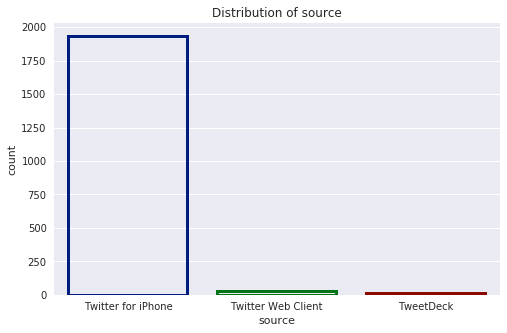

In [95]:
#plot the count of source
print(twitter_df['source'].value_counts())
plt.figure(figsize=(8,5))
sns.set(style='darkgrid')
sns.countplot(data = twitter_df, x='source', order = sorted_source, facecolor=(0, 0, 0, 0),linewidth=3,edgecolor=sns.color_palette("dark", 3))
plt.title('Distribution of source')
plt.show()

This plot above shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

# Plot retweets and favorites count

In [105]:
time_df = twitter_df[['timestamp', 'retweets', 'favorites', 'rating_numerator', 'rating_denominator']].copy()

In [106]:
time_df.set_index('timestamp', inplace=True)

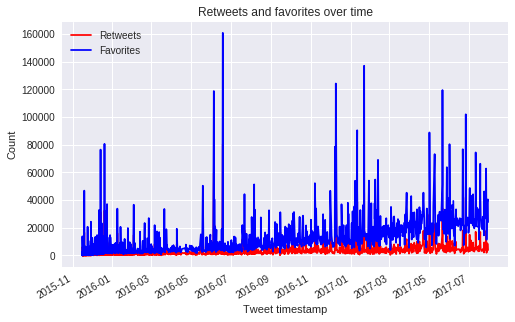

In [108]:
plt.figure(figsize=(8,5))
time_df['retweets'].plot(color = 'red', label='Retweets')
time_df['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

The graph shows that the highest number of retweets are posted mostly during July,2016 and most tweets are liked during July, 2017.

## Visualizing the relationship between favorites and retweets

Text(0.5,1,'Relationship between retweets and favorites')

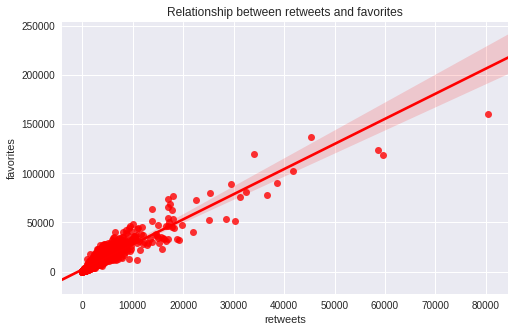

In [109]:
#plot the relationship in scatter plot
plt.figure(figsize=(8,5))
sns.regplot(x='retweets',y='favorites',data=twitter_df, color="red")
plt.title('Relationship between retweets and favorites')

A reasonable hypothesis is that most popular tweets usually get a large number of retweets and favorite counts. The graph shows a strong positive relationship between ‘retweet_count’ and ‘favorite_count’. 

# Analyzing Prediction 1 

## p1 confidence score visualization 

Text(0.5,1,'p1 Confidence score distribution')

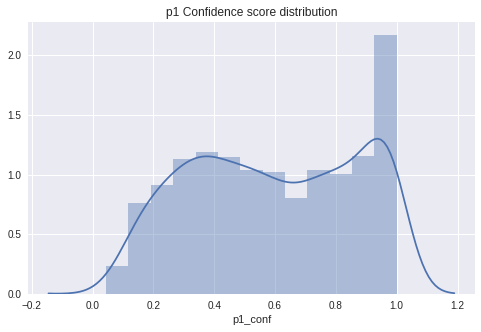

In [110]:
#plot the distibution of confidence score
plt.figure(figsize=(8,5))
sns.distplot(twitter_df.p1_conf)
plt.title('p1 Confidence score distribution')

##  Visualization of p1 success rate

True     1461
False     513
Name: p1_dog, dtype: int64


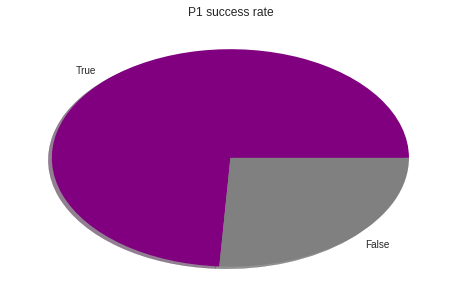

In [111]:
#success rate of first algorithm
plt.figure(figsize=(8,5))
plt.pie(twitter_df.p1_dog.value_counts(),labels=['True','False'],shadow=True, colors=['purple','grey'])
plt.title('P1 success rate')
print(twitter_df.p1_dog.value_counts())

## Visualization of top 10 breed of dogs predicted by p1 

Text(0.5,1,'Top 10 dog breeds predicted by p1')

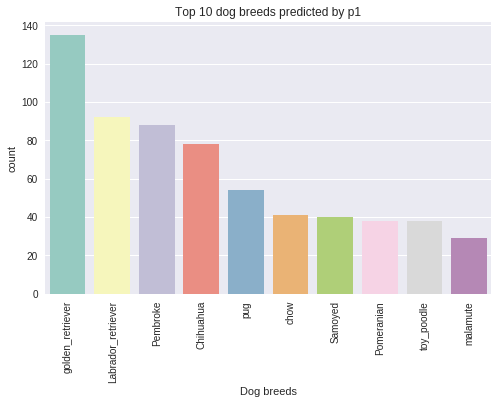

In [112]:
#top 10 dog breeds 
plt.figure(figsize=(8,5))
sorted_p1=twitter_df.p1.value_counts().head(10).index
sns.countplot(twitter_df.p1, data=twitter_df,order=sorted_p1, palette = "Set3")
plt.xticks(rotation=90)
plt.xlabel('Dog breeds')
plt.title('Top 10 dog breeds predicted by p1')

## Visualization of top 10 breeds that received highest number of likes 

In [113]:
#count of breeds that received highest number of likes
plt.figure(figsize=(8,5))
fav_count_p1 = twitter_df.groupby('p1').favorites.sum().nlargest(10)
print(fav_count_p1)

p1
golden_retriever      1575236.0
Labrador_retriever    1007959.0
Pembroke               953126.0
Chihuahua              629322.0
Samoyed                492501.0
French_bulldog         448462.0
chow                   389903.0
pug                    299913.0
cocker_spaniel         296042.0
Pomeranian             291475.0
Name: favorites, dtype: float64


Text(0.5,1,'Top 10 breeds that received highest number of likes')

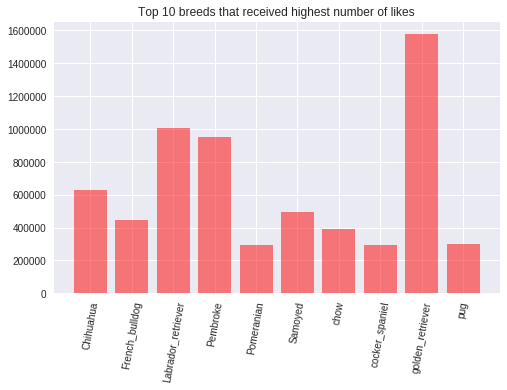

In [114]:
#plot the breeds with highest number of likes
plt.figure(figsize=(8,5))
plt.bar(x=fav_count_p1.index, height=fav_count_p1.values,color='red',alpha=0.5)
plt.xticks(rotation=80)
plt.title('Top 10 breeds that received highest number of likes')

# Conclusion

1. Distribution of source
We can see that the dominant source of tweets is from iPhone twitter app, which is 94% in total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

2. Retweets and favorites over time
The graph shows that the highest number of retweets are posted mostly during July,2016 and most tweets are liked during July, 2017.

3. Relationship between retweets and favorites
The scatter plot shows a strong positive relationship between ‘retweet_count’ and ‘favorite_count’.

4. Analysis of dog results generated by first algorithm

	- First algorithm has predicted around 75% of the dog breeds accurately.
    - 'Golden retriever', 'Labrador retriever' and 'Pembroke' are the top 3 dog breeds analyzed by first algorithm.
    - 'Chihuahua', 'French buildog' and 'labrador retriever' are the top 3 breeds that received highest number of likes.
    - 'Bow tie', 'Golden retriever' and 'Labrador retriever' are the dog breeds that received highest scores.



